# Pymaceuticals

## Introduction and Objective

Squamous cell carcinoma (SCC) is the second most common type of skin cancer after basal cell carcinoma in the U.S. In order to asses the efectivenes of four treatment drugs (Capomulin, Infubinol, Ketapril, and Placebo), 250 mice per treatment were administered with the corresponding drug over the course of 45 days. During this time frame, the tumor volume and the mestastatic sites were measured.

## Conclusions

-  The most effective drug from the selection was Capomulin since reduced the volume of the tumor and its capacity to spread. 

- Infubinol is the second best after Capomulin with less metastic sites, however it has the lowest survival rate from all the 4 drugs tested

In [1]:
# Dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug=pd.read_csv("data/mouse_drug_data.csv")
clinical_response=pd.read_csv("data/clinicaltrial_data.csv")




**Data exploration, cleaning and selecting**

In [2]:
mouse_drug.info()
mouse_drug.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
clinical_response.info()
len(clinical_response["Mouse ID"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


1893

In [4]:
drug_response=clinical_response.merge(mouse_drug,on="Mouse ID",how="inner")
drug_response.head()
drug_response["Drug"].value_counts()

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64

In [5]:
#Selecting drugs to test
drug_response_select=drug_response[(drug_response["Drug"]=='Capomulin')|
                                   (drug_response["Drug"]=='Ketapril')|
                                   (drug_response["Drug"]=='Placebo')|
                                   (drug_response["Drug"]=='Infubinol')]

In [6]:
drug_response_select.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
drug_response_select["Drug"].value_counts()

Capomulin    230
Ketapril     188
Placebo      181
Infubinol    178
Name: Drug, dtype: int64

**Tumor Response To Selected Drugs treatment**

In [8]:
mean_vol=pd.DataFrame(data=drug_response_select.groupby(["Drug","Timepoint"]).mean()).drop(["Metastatic Sites"], axis=1)
mean_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082

In [9]:
sem_volume=drug_response_select.groupby(["Drug","Timepoint"]).sem().drop(["Metastatic Sites","Mouse ID"], axis=1)
sem_volume

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
Ketapril  0                    0.000000
          5                    0.264819
          10                   0.357421
          15                   0.580268
          20                   0.726484
          25                   0.755413
          30                   0.934121
          35                   1.127867
          40                   1.158449
          45                   1.453186
Placebo   0                    0.000000
          5                    0.218091
          10                   0.402064
          15                   0.614461
          20                   0.839609
          25                   1.034872
          30                   1.218231
          35                   1.287481
          40                   1.370634
          45                   1.351726

In [10]:
mean_vol = mean_vol.unstack(level=0)
mean_vol.columns = mean_vol.columns.get_level_values(1)
mean_vol

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [11]:
sem_volume = sem_volume.unstack(level=0)
sem_volume.columns = sem_volume.columns.get_level_values(1)
sem_volume

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


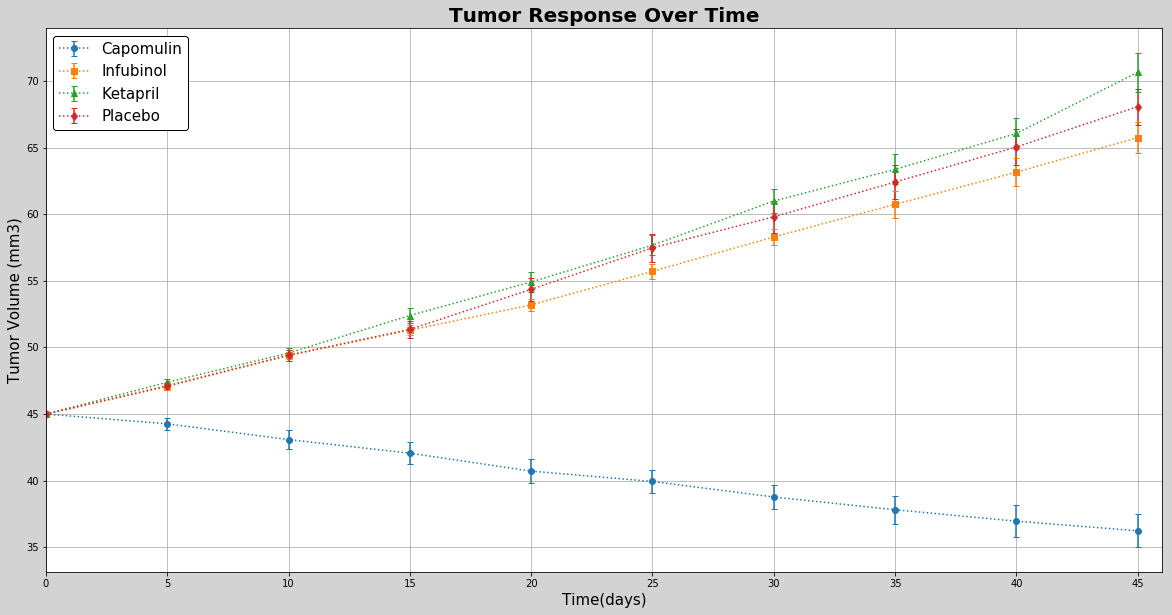

In [45]:
plt.figure(facecolor="lightgray",figsize=(20,10))
plt.grid()

plt.title('Tumor Response Over Time', fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Time(days)', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, mean_vol.index.max()+3 , 5))
plt.xlim(0, mean_vol.index.max() + 1) 
markers = ['o', 's', '^', 'd']

x_val = mean_vol.index 

count = 0


for tumor in mean_vol.columns:
    plt.errorbar(x_val, 
                 mean_vol[tumor], 
                 sem_volume[tumor], 
                 linestyle = ':', 
                 marker =  markers[count], 
                 capthick = 1,
                 capsize = 3)  
    count += 1


plt.legend(frameon = True,edgecolor = 'black',framealpha = 1,fontsize = '15')

plt.show()

**Metastatic Response to Treatment**

In [14]:
mean_met=pd.DataFrame(data=drug_response_select.groupby(["Drug","Timepoint"]).mean()).drop(["Tumor Volume (mm3)"], axis =1)
mean_met

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
Ketapril  0                  0.000000
          5                  0.304348
          10                 0.590909
          15                 0.842105
          20                 1.210526
          25                 1.631579
          30                 2.055556
          35                 2.294118
          40                 2.733333
          45                 3.363636
Placebo   0                  0.000000
          5                  0.375000
          10                 0.833333
          15                 1.250000
          20                 1.526316
          25                 1.941176
          30                 2.266667
          35                 2.642857
          40                 3.166667
          45                 3.272727

In [15]:
sem_met=drug_response_select.groupby(["Drug","Timepoint"]).sem().drop(["Tumor Volume (mm3)","Mouse ID"], axis=1)
sem_met

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
Ketapril  0                  0.000000
          5                  0.098100
          10                 0.142018
          15                 0.191381
          20                 0.236680
          25                 0.288275
          30                 0.347467
          35                 0.361418
          40                 0.315725
          45                 0.278722
Placebo   0                  0.000000
          5                  0.100947
          10                 0.115261
          15                 0.190221
          20                 0.234064
          25                 0.263888
          30                 0.300264
          35                 0.341412
          40                 0.297294
          45                 0.304240

In [16]:
mean_met = mean_met.unstack(level=0)
mean_met.columns = mean_met.columns.get_level_values(1)
mean_met

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [17]:
sem_met = sem_met.unstack(level=0)
sem_met.columns = sem_met.columns.get_level_values(1)
sem_met

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


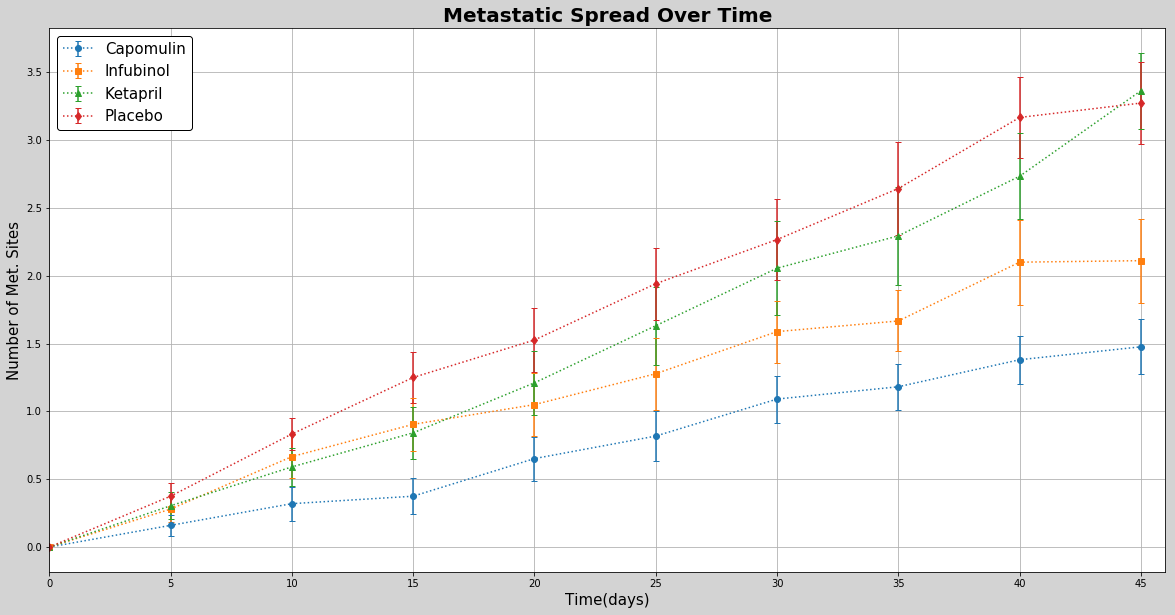

In [44]:
plt.figure(facecolor="lightgray",figsize=(20,10))
plt.grid()

plt.title('Metastatic Spread Over Time', fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Time(days)', fontdict = {'fontsize': 15})
plt.ylabel('Number of Met. Sites', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, mean_met.index.max()+3 , 5))
plt.xlim(0, mean_met.index.max() + 1) 
markers = ['o', 's', '^', 'd']

x_val = mean_met.index 

count = 0


for meta in mean_met.columns:
    plt.errorbar(x_val, 
                 mean_met[meta], 
                 sem_met[meta], 
                 linestyle = ':', 
                 marker =  markers[count], 
                 capthick = 1,
                 capsize = 3)  
    count += 1


plt.legend(frameon = True,edgecolor = 'black',framealpha = 1,fontsize = '15')

plt.show()

**Survival Rates**

In [28]:
mouse_count=pd.DataFrame(data=drug_response_select.groupby(["Drug","Timepoint"]).count()).drop(["Metastatic Sites","Tumor Volume (mm3)"], axis=1)
mouse_count.rename(columns={"Mouse ID":"Mouse Count"})

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9
Ketapril  0                   25
          5                   23
          10                  22
          15                  19
          20                  19
          25                  19
          30                  18
          35                  17
          40                  15
          45                  11
Placebo   0                   25
          5                   24
          10                  24
          15                  20
          20                  19
          25                  17
          30                  15
          35                  14
          40                  12
          45                  11

In [29]:
mouse_count = mouse_count.unstack(level=0)
mouse_count.columns = mouse_count.columns.get_level_values(1)
mouse_count

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


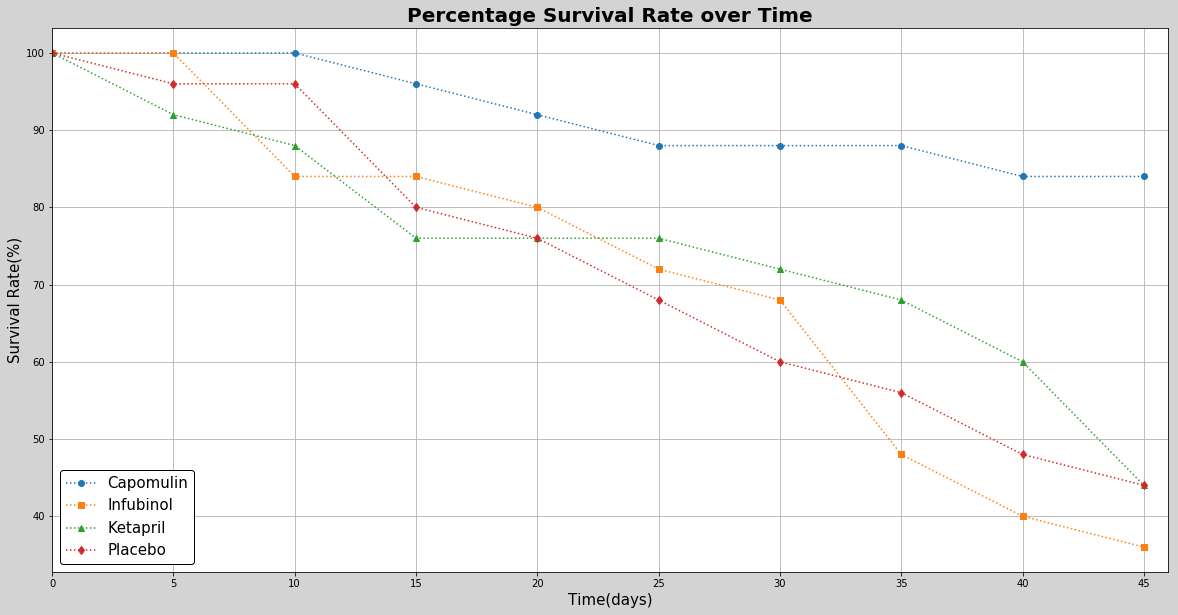

In [47]:
plt.figure(facecolor="lightgray",figsize=(20,10))
plt.grid()

plt.title('Percentage Survival Rate over Time', fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Time(days)', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate(%)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, mouse_count.index.max()+3 , 5))
plt.xlim(0, mouse_count.index.max() + 1) 
markers = ['o', 's', '^', 'd']

x_val = mouse_count.index 

count = 0


for mouse in mouse_count:
    y_val=mouse_count[mouse]/mouse_count.loc[0,mouse]*100
    plt.plot(x_val, 
             y_val, 
             linestyle = ':', 
             marker =  markers[count]) 
    count += 1


plt.legend(frameon = True,edgecolor = 'black',framealpha = 1,fontsize = '15',loc=3)

plt.show()

**Summary Bar Graph**

In [49]:
vol_change = (mean_vol.loc[45, :] - mean_vol.loc[0, :])/mean_vol.loc[0, :] * 100
vol_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

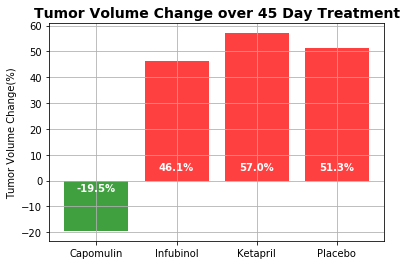

In [78]:
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Tumor Volume Change(%)')
x_val=vol_change.index
plt.xticks(np.arange(len(x_val)), x_val)
plt.grid()
       
count = 0

for i in vol_change:
    if i < 0:
        y_val = -4
    else:
        y_val = 4
    plt.text(count, y_val, str(round(i, 1)) + '%', ha = 'center', color = 'white', fontweight= 'bold')
    count += 1
    
plt.bar(np.arange(4), vol_change,color = ['red' if vol_change[i] > 0 else 'green' for i in np.arange(len(x_val))],alpha=.75)   
plt.show()
